# <center>DEEP NEURAL NETWORK PRACTICAL</center>
## MNIST HANDWRITTEN DIGITS CLASSIFICATION

### NOTEBOOK IMPORTS

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import random
import cv2
import datetime

import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

### PACKAGE VERSIONS

In [4]:
print("Numpy: ", np.__version__)
print("Keras: ", keras.__version__)
print("OpecnCV: ", cv2.__version__)

Numpy:  1.18.5
Keras:  2.4.3
OpecnCV:  4.4.0


### DATA IMPORTS

In [5]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()


print('Shape X_train: ', X_train.shape)
print('Shape X_test: ', X_test.shape)

11493376/11490434 [==============================] - 9s 1us/step
Shape X_train:  (60000, 28, 28)
Shape X_test:  (10000, 28, 28)


### CHECKING IMPORT ERRORS

In [6]:
# Your implementation should pass these tests. 
# A small checks to ensure that correct data have been imported

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

### VISUALIZE DATA

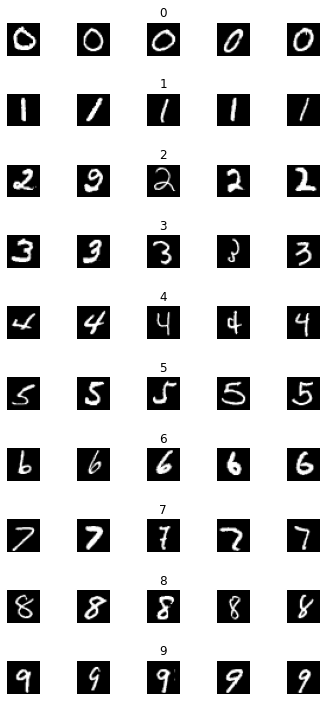

In [7]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        
        # for title as the label in middle
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


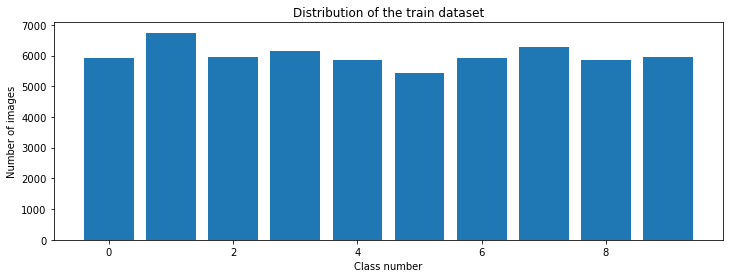

In [8]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

### RESHAPE, ONE-HOT ENCODING, NORMALIZE

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1) # reshape(-1, 28, 28, 1), we can simply put a -ve 1 in first
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [10]:
print('Shape X_train: ', X_train.shape)
print('Shape X_test: ', X_test.shape)

Shape X_train:  (60000, 28, 28, 1)
Shape X_test:  (10000, 28, 28, 1)


### MODEL BUILDING

    We are using the LeNet Model for this purpose.
   Below is the figure of **LeNet Architecture**

<img src='LeNet.png'>

In [11]:
def leNet_model():

    model = Sequential()

    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [12]:
np.random.seed(47)

model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               1

In [13]:
history=model.fit(X_train, y_train, 
                  epochs=10,  validation_split = 0.1, 
                  batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 39s 288ms/step - loss: 0.5415 - accuracy: 0.8331 - val_loss: 0.0982 - val_accuracy: 0.9740
Epoch 2/10
135/135 [==============================] - 33s 243ms/step - loss: 0.1301 - accuracy: 0.9608 - val_loss: 0.0589 - val_accuracy: 0.9843
Epoch 3/10
135/135 [==============================] - 33s 247ms/step - loss: 0.0860 - accuracy: 0.9730 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 4/10
135/135 [==============================] - 32s 235ms/step - loss: 0.0675 - accuracy: 0.9796 - val_loss: 0.0383 - val_accuracy: 0.9888
Epoch 5/10
135/135 [==============================] - 33s 246ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 6/10
135/135 [==============================] - 39s 286ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 7/10
135/135 [==============================] - 37s 272ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0353 - val_ac

### LOSSES AND ACCURACY

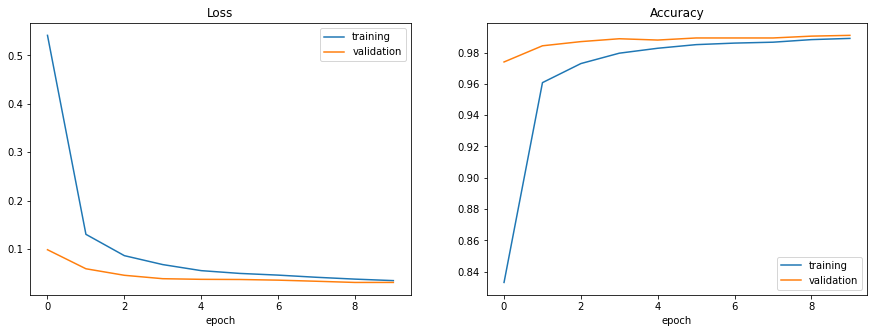

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0233 - accuracy: 0.9929
Test score: 0.02329416759312153
Test accuracy: 0.992900013923645


### TENSORBOARD LOGS AND VISUALIZATON

In [16]:
# %tensorboard --logdir logs/fit

### MAKING PREDICTION

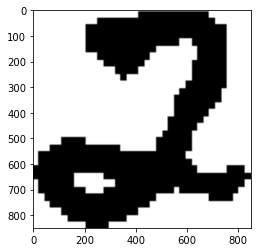

In [17]:

#predict internet number
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


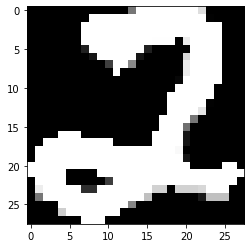

In [18]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img) # color interchange
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [19]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [26]:
print("predicted digit: "+str(np.argmax(model.predict(img), axis=-1)[0]))

predicted digit: 2


### APPENDIX: Visualizing Hidden Layers, Live Loss Plot

In [21]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


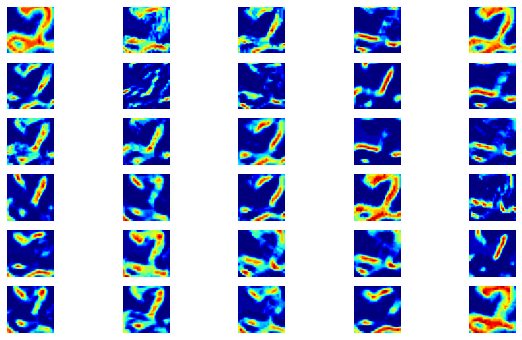

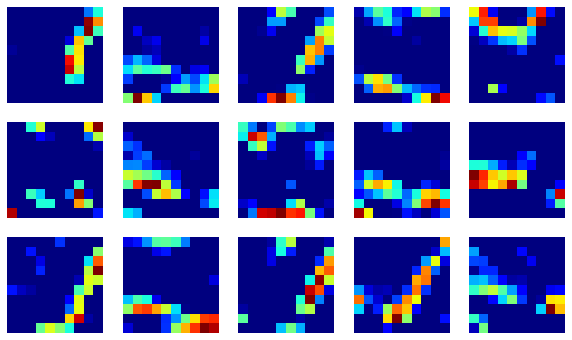

In [22]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

   **Live Loss Plot**
   
    from livelossplot import PlotLossesKeras

    model = leNet_model()

    callbacks = [PlotLossesKeras()]

    history=model.fit(X_train, y_train, 
                      epochs=10,  validation_split = 0.1, callbacks=callbacks, 
                      batch_size = 400, verbose = 1, shuffle = 1)